In [2]:
# Import needed packages and define rootpath
import os
import sys
import pandas as pd
import glob
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns

root_path = os.path.abspath(os.path.join('../..')) # <- adjust such that root_path always points at the root project dir (i.e. if current file is two folders deep, use '../..'). 
if root_path not in sys.path:
    sys.path.append(root_path)


In [3]:
# Get sweep_results for desired features/hyperparamter/metrics from desired coarse tuning
pkl_files = glob.glob(os.path.join(root_path, "models", "trad_ml", "sweep_results","logreg_feature_ma_alpha", "*.pkl"))

accuracy_ma_alpha = []
for file in pkl_files:
    with open(file, 'rb') as f:
        obj = pkl.load(f)
        file_name = os.path.basename(file)  # Get only the file name from the path
        file_name_without_ext = os.path.splitext(file_name)[0]  # Remove the file extension
        shortened_file_name = file_name_without_ext[:-16]  # Remove the last 6 characters
        accuracy_ma_alpha.append({
            'Ma_alpha': obj['fg_config']['ma_alpha'],
            'Accuracy': obj['metrics']['accuracy'],
            'Log Loss': obj['metrics']['lnloss'],
        })

df = pd.DataFrame(accuracy_ma_alpha)

print(df)

    Ma_alpha  Accuracy  Log Loss
0       0.25  0.514238  1.014632
1       0.30  0.519516  1.018225
2       0.30  0.515355  1.017114
3       0.35  0.519516  1.017802
4       0.35  0.513121  1.017226
5       0.40  0.515668  1.021160
6       0.40  0.513680  1.022261
7       0.45  0.516767  1.022948
8       0.45  0.513680  1.023299
9       0.50  0.513469  1.022405
10      0.05  0.525563  0.997460
11      0.50  0.510329  1.024654
12      0.55  0.511270  1.026732
13      0.55  0.507538  1.026844
14      0.60  0.509071  1.027840
15      0.60  0.506421  1.028021
16      0.65  0.510170  1.027645
17      0.65  0.505304  1.028087
18      0.70  0.509621  1.029683
19      0.70  0.508096  1.028682
20      0.75  0.511270  1.029416
21      0.05  0.526521  0.994354
22      0.75  0.507538  1.029406
23      0.80  0.507422  1.029092
24      0.80  0.508096  1.029967
25      0.85  0.510720  1.030492
26      0.85  0.513680  1.031605
27      0.90  0.507971  1.032786
28      0.90  0.513121  1.031395
29      0.

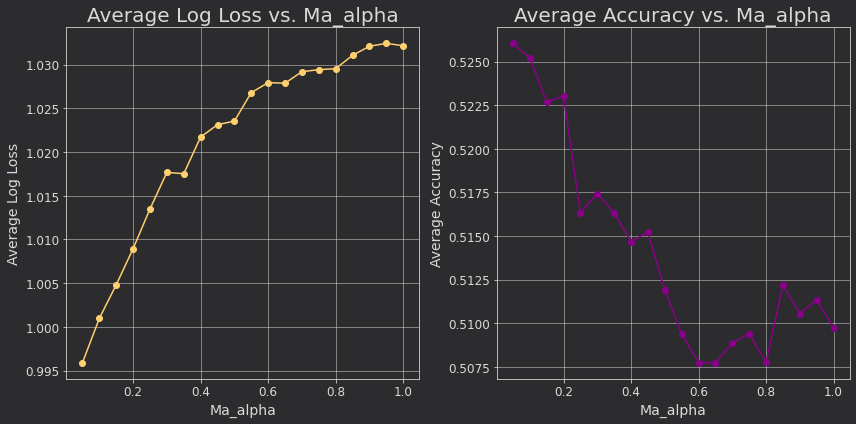

In [21]:
# Plot

# Group the DataFrame by 'Ma_alpha' and calculate the average of 'Log Loss' and 'Accuracy' for each group
grouped_df = df.groupby('Ma_alpha').mean()

# Define the colors
log_loss_color = (255/255, 208/255, 112/255)  # Gold with transparency
accuracy_color = (139/255, 0/255, 139/255)   # Purple with transparency
label_color = (218/255, 218/255, 218/255)          # Light grey
grid_color = (218/255, 218/255, 218/255)           # Light grey
background_color = (44/255, 44/255, 46/255)        # Dark grey
legend_color = (169/255, 169/255, 169/255)         # grey

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Set the background color of the plot (entire figure)
fig.set_facecolor(background_color)

# Plot the average 'Log Loss' against 'Ma_alpha' in the first subplot
axes[0].plot(grouped_df.index, grouped_df['Log Loss'], label='Average Log Loss', marker='o', color=log_loss_color)
axes[0].set_xlabel('Ma_alpha', color=label_color, fontsize = 14)
axes[0].set_ylabel('Average Log Loss', color=label_color, fontsize = 14)
axes[0].set_title('Average Log Loss vs. Ma_alpha', color=label_color, fontsize = 20)
axes[0].grid(True, color=grid_color, linestyle='-', linewidth=0.5)
axes[0].tick_params(axis='x', colors=label_color, labelsize =12)
axes[0].tick_params(axis='y', colors=label_color, labelsize = 12)
axes[0].spines['top'].set_color(label_color)
axes[0].spines['bottom'].set_color(label_color)
axes[0].spines['left'].set_color(label_color)
axes[0].spines['right'].set_color(label_color)

# Set the facecolor for the first subplot
axes[0].set_facecolor(background_color)

# Plot the average 'Accuracy' against 'Ma_alpha' in the second subplot
axes[1].plot(grouped_df.index, grouped_df['Accuracy'], label='Average Accuracy', marker='o', color=accuracy_color)
axes[1].set_xlabel('Ma_alpha', color=label_color, fontsize = 14)
axes[1].set_ylabel('Average Accuracy', color=label_color, fontsize = 14)
axes[1].set_title('Average Accuracy vs. Ma_alpha', color=label_color, fontsize = 20)
axes[1].grid(True, color=grid_color, linestyle='-', linewidth=0.5)
axes[1].tick_params(axis='x', colors=label_color, labelsize = 12)
axes[1].tick_params(axis='y', colors=label_color, labelsize = 12)
axes[1].spines['top'].set_color(label_color)
axes[1].spines['bottom'].set_color(label_color)
axes[1].spines['left'].set_color(label_color)
axes[1].spines['right'].set_color(label_color)

# Set the facecolor for the second subplot
axes[1].set_facecolor(background_color)

plt.tight_layout()  # Adjust spacing between subplots

# Save the plot
plt.savefig("optimization_ma_alpha_plot.png", dpi=300, bbox_inches="tight")

plt.show()